# <a> Principal Component Analysis e Clusterização </a>

Principal Component Analysis (PCA) é uma técnica estatística muito utilizada para simplificar a complexidade em um determinado conjunto de dados, de forma a garantir maior interpretabilidade do estudo. A necessidade de utilização dessas técnicas surge quando o conjunto de dados analisado é relativamente grande, dificultando a visualização da relação entre as features. Além disso, também é útil aplicar técnicas de PCA em situações que a utilização de modelos preditivos se beneficia de um menor número de variáveis. 

Outro ponto interessante é que as técnicas de PCA também podem ser empregadas conjuntamente com técnicas de clusterização. Isso ocorre pois a partir da construção de aglomerados, é possível reconhecer suas características por meio da redução do número de features do DataFrame, gerando, dessa forma, resultados mais impactantes numa análise de clusterização.

# <a> Visão Geral - PCA para Segmentação de Clientes 

O presente projeto consiste na construção de uma segmentação de clientes com o objetivo de garantir maior eficiência no lançamento de um produto no mercado automotivo.

Nesse sentido, é importante executar pesquisas de mercado com os possíveis consumidores tendo em vista a análise de alguns fatores, tais como as preferências dos compradores, além de determinados dados demográficos. Dado que o produto em questão é uma microvan, o presente projeto tem por objetivos:

- Identificar qual é o segmento alvo para esse veículo
- Compreender as características de tal segmento
- Reconhecer os consumidores com maior propensão à compra.

Para alcançar tais objetivos, é necessário realizar uma coleta de dados abrangente, incluindo pesquisas primárias, grupos focais direcionados e pesquisas em larga escala. A análise desses dados demográficos permite a identificação do perfil dos potenciais consumidores. Além disso, foi realizada uma seleção criteriosa de atributos relevantes, buscando capturar as dimensões-chave que caracterizam os potenciais compradores da microvan.

Após a seleção dos atributos, foi apresentado o projeto da microvan aos consumidores, obtendo-se notas de avaliação para analisar a aceitação do conceito. Nesse sentido, será aplicada a técnica de Principal Component Analysis (PCA) para reduzir a dimensionalidade das features da base de dados, agrupando aquelas com variância similar. A utilização da Análise de Componentes Principais é interessante pois permite trazer mais interpretabilidade à análise. Após isso, a utilização de métodos de clusterização permitirá a formação de grupos homogêneos de consumidores, facilitando a identificação de perfis de interesse.

Ao avaliar os resultados da redução de dimensionalidade em termos dos interesses dos consumidores, será possível identificar o segmento alvo para a microvan. Este projeto destaca-se por sua aplicabilidade em diversos setores, evidenciando a utilidade da análise de questionários e redução de dimensionalidade destes a partir de técnicas de análise de componentes principais para empresas que buscam compreender as preferências de seus clientes.

* O estudo de caso analisado neste projeto está disponível no livro "Modern Marketing Research: Concepts, Methods, and Cases"

Este projeto foi construído durante a formação da "Let's Data" - Jornada Cientista de Dados - https://www.letsdata.ai

In [1]:
# Importando bibliotecas necessárias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA

# Setando configurações do pandas para mostrar todas as linhas e colunas 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Setando configurações no pandas para não mostrar números com notação científica
pd.set_option('display.float_format', lambda x: "%.2f" % x) # Mostrando numeros com apenas 2 casas decimais

In [2]:
# Ignorando warnings 
warnings.filterwarnings("ignore")

In [3]:
# Lendo dados 
df = pd.read_csv('./data/microvan.csv')

In [4]:
# Visualizando dados
df.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [5]:
# Visualizando todas as features da base de dados
df.columns

Index(['subjnumb', 'mvliking', 'kidtrans', 'miniboxy', 'lthrbetr', 'secbiggr',
       'safeimpt', 'buyhghnd', 'pricqual', 'prmsound', 'perfimpt', 'tkvacatn',
       'noparkrm', 'homlrgst', 'envrminr', 'needbetw', 'suvcmpct', 'next2str',
       'carefmny', 'shdcarpl', 'imprtapp', 'lk4whldr', 'kidsbulk', 'wntguzlr',
       'nordtrps', 'stylclth', 'strngwrn', 'passnimp', 'twoincom', 'nohummer',
       'aftrschl', 'accesfun', 'age', 'income', 'miles', 'numkids', 'female',
       'educ', 'recycle'],
      dtype='object')

Levando em consideração que o nome das features não é muito mnemônico, é necessário identificar cada variável por meio de um dicionário de dados.

No entanto, como a feature 'subjnumb', que representea o "Subject Number" serve apenas para identificar cada indivíduo, é possível passá-la como sendo o índice do DataFrame.

In [6]:
# Setando coluna subjnumb (subject number) como índice da base de dados
df = df.set_index("subjnumb")

In [7]:
# Visualizando mudança 
df.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


## <a> Dicionário de Dados </a>

Como há variáveis com desrições longas, é inviável dispor a visualização da tabela do dicionário de dados. No entanto, vamos criar um objeto 'dict' para acessar a descrição de cada variável. 

In [8]:
# Criando Dicionário de Dados
dicionario_dados = dict()

# Preenchendo o dicionário
dicionario_dados['mvliking'] = 'Quanto o cliente gostou do conceito da microvan.'
dicionario_dados['kidtrans'] = 'Precisamos de um carro que ajude a transportar nossos filhos e seus amigos.'
dicionario_dados['miniboxy'] = 'As minivans atuais são simplesmente muito quadradas e grandes.'
dicionario_dados['lthrbetr'] = 'Os assentos de couro são muito melhores que os de tecido'
dicionario_dados['secbiggr'] = 'Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão'
dicionario_dados['safeimpt'] = 'A segurança do automóvel é muito importante para mim'
dicionario_dados['buyhghnd'] = 'Nós tendemos a comprar carros mais sofisticados'
dicionario_dados['pricqual'] = 'Os preços dos automóveis refletem fortemente a qualidade de produção subjacente'
dicionario_dados['prmsound'] = 'Um sistema de som e entretenimento premium ajuda em longas viagens de carro'
dicionario_dados['perfimpt'] = 'O desempenho é muito importante em um carro'
dicionario_dados['tkvacatn'] = 'Tentamos tirar o máximo de férias possível'
dicionario_dados['noparkrm'] = 'Nossa residência atual não tem muito espaço de estacionamento'
dicionario_dados['homlrgst'] = 'Nossa casa está entre as maiores do bairro'
dicionario_dados['envrminr'] = 'O impacto ambiental dos automóveis é relativamente pequeno'
dicionario_dados['needbetw'] = 'Precisa haver algo entre um sedan e uma minivan'
dicionario_dados['suvcmpct'] = 'Gosto mais de SUVs do que de minivans, pois são mais compactos'
dicionario_dados['next2str'] = 'Meu próximo carro será um de dois lugares'
dicionario_dados['carefmny'] = 'Temos cuidado com o dinheiro'
dicionario_dados['shdcarpl'] = 'Acho que todo mundo deveria pegar carona ou usar transporte público'
dicionario_dados['imprtapp'] = 'A maioria dos nossos aparelhos são importados'
dicionario_dados['lk4whldr'] = 'A tração nas quatro rodas é uma opção muito atraente'
dicionario_dados['kidsbulk'] = 'Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles'
dicionario_dados['wntguzlr'] = 'Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”'
dicionario_dados['nordtrps'] = 'Não fazemos viagens com a família'
dicionario_dados['stylclth'] = 'Nós tendemos a comprar roupas elegantes para a família'
dicionario_dados['strngwrn'] = 'A proteção da garantia precisa ser forte em um carro novo'
dicionario_dados['passnimp'] = 'A paixão pelo trabalho é mais importante do que o pagamento'
dicionario_dados['twoincom'] = 'Nossa família acharia difícil subsistir com apenas uma renda'
dicionario_dados['nohummer'] = 'Não estou interessado em possuir um veículo como um Hummer'
dicionario_dados['aftrschl'] = 'Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias'
dicionario_dados['accesfun'] = 'Os acessórios realmente tornam o carro mais divertido de dirigir'
dicionario_dados['age'] = 'Idade do entrevistado em anos'
dicionario_dados['income'] = 'Renda familiar anual em milhares de dólares'
dicionario_dados['miles'] = 'Valor anual total conduzido por membros da família em milhares de milhas'
dicionario_dados['numkids'] = 'Número de crianças (0-18 anos) que residem no domicílio'
dicionario_dados['female'] = 'Se o entrevistado é ou não uma mulher'
dicionario_dados['educ'] = 'Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)'
dicionario_dados['recycle'] = 'Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)'

In [9]:
# Testando aplicabilidade do dicionário
dicionario_dados['female'], dicionario_dados['age'], dicionario_dados['income']

('Se o entrevistado é ou não uma mulher',
 'Idade do entrevistado em anos',
 'Renda familiar anual em milhares de dólares')

### <a> Informações Iniciais </a>

In [10]:
# Visualizando dimensões da base de dados
print(f"A base de dados possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

A base de dados possui 400 linhas e 38 colunas.


In [11]:
# Analisando os tipos de dados da base de dados
df.dtypes

mvliking    int64
kidtrans    int64
miniboxy    int64
lthrbetr    int64
secbiggr    int64
safeimpt    int64
buyhghnd    int64
pricqual    int64
prmsound    int64
perfimpt    int64
tkvacatn    int64
noparkrm    int64
homlrgst    int64
envrminr    int64
needbetw    int64
suvcmpct    int64
next2str    int64
carefmny    int64
shdcarpl    int64
imprtapp    int64
lk4whldr    int64
kidsbulk    int64
wntguzlr    int64
nordtrps    int64
stylclth    int64
strngwrn    int64
passnimp    int64
twoincom    int64
nohummer    int64
aftrschl    int64
accesfun    int64
age         int64
income      int64
miles       int64
numkids     int64
female      int64
educ        int64
recycle     int64
dtype: object

In [12]:
# Analisando demais informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wntguzl

Todas as colunas estão em formato inteiro, pois armazenam informações relativas à nota que cada entrevistado deu para cada um dos critérios, e, quando se tratando de variáveis demográficas, também representam valores inteiros (já que são variáveis métricas). 
Além disso, não há dados faltantes no DataFrame.

## <a> Estatística Descritiva e EDA</a>

Essa etapa é fundamental para entender a base de dados utilizada. Aqui serão analisadas separatrizes, distribuições, medidas de tendência central, medidas de dispersão e mais.

In [13]:
# Analisando estatisticas descritivas do DataFrame
df.describe()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


Como era de se esperar, as variáveis provenientes do questionário estão compreendidas no intervalo de 1 a 9. O valor dessas variáveis corresponde a nota que o entrevistado deu para cada um dos atributos do questionário. 

Já no que diz respeito às variáveis demográficas, observa-se diferenças no intervalo de valores em razão de sua natureza.

## <a> Definindo Funções para Plotar Gráficos </a>

#### <a> Histograma </a>

In [14]:
# Criando função de histograma para visualização gráfica
def histograma(dados, var, legenda):
    """
    Gera um histograma para a variável especificada no dataframe fornecido.

    Parâmetros:
    -> dados (DataFrame): O dataframe contendo os dados a serem utilizados.
    -> var (str): O nome da variável para a qual deseja-se gerar o histograma.
    -> legenda (tuple): Uma tupla contendo duas strings - a primeira para a legenda do eixo x e a segunda para o título do gráfico
    """
    
    sns.set_style("white") # Setando estilo do seaborn 
    plt.figure(figsize=(8,4)) # Definindo tamanho do objeto figure
    sns.histplot(data = dados, x = f'{var}', color = '#800080') # Plotando o gráfico
    sns.despine(bottom = True, left = True) # Retirando bordas
    plt.ylabel("Quantidade", color = 'grey', fontsize = 10, labelpad = 15) # Colocando legenda 
    plt.tick_params(axis = 'y', labelsize = 9, color = 'grey') # e ajustando eixo y
    plt.xlabel(f"{legenda[0]}", color = 'grey', fontsize = 10, labelpad = 15) # Colocando legenda 
    plt.tick_params(axis = 'x', labelsize = 9, color = 'grey') # e ajustando o eixo x
    
    # Colocando titulo
    plt.title(f"{legenda[1]}", color = 'k', pad = 20, fontsize = 15, fontweight = 'bold')
    
    # Mostrando 
    plt.show()

#### <a> Countplot </a>

In [15]:
# Criando função para visualização de countplots
def countplot(dados, var, cat, legenda, map):
    """
    Gera um countplot para a variável especificada a partir do dataframe fornecido.

    Parâmetros:
    -> dados (DataFrame): O dataframe contendo os dados a serem utilizados.
    -> var (str): O nome da variável para a qual deseja-se gerar o countplot.
    -> cat (str): O nome da variável de categoria (hue) para diferenciação no countplot.
    -> legenda (tuple): Uma tupla contendo duas strings - a primeira para a legenda do eixo x e a segunda para o título do gráfico.
    -> map (dict): Um dicionário para mapeamento contendo as chaves e o valor para troca. Ex: {0: Homens, 1: Mulheres}
    """
    # Definindo cores para a paleta
    color = ['#00FFFF', '#800080'] # Cores ciano e roxo 
    sns.set_style("white") # Setando estilo do seaborn
    plt.figure(figsize=(8,6)) # Definindo tamanho do objeto figure    
    sns.countplot(dados, x = f"{var}", palette = color, hue = f"{cat}", legend = False) # Plotando gráfico
    sns.despine(bottom = True, left = True) # Retirando bordas
    plt.ylabel("[]", color = 'grey', fontsize = 0, labelpad = 15) # Tirando legenda do eixo y
    plt.tick_params(axis = 'y', labelsize = 9, color = 'grey') # e ajustando eixo y
    plt.xlabel(f"{legenda[0]}", color = 'grey', fontsize = 10, labelpad = 15) # Colocando legenda 
    plt.tick_params(axis = 'x', labelsize = 9, color = 'grey') # e ajustando o eixo x
    plt.title(f"{legenda[1]}", color = 'k', pad = 20, fontsize = 15, fontweight = 'bold') # Colocando título
    chaves, valores = zip(*map.items()) # Criando tupla de chave:valor para mapeamento 
    plt.xticks(chaves, valores) # Mapeando valores para eixo x
    # Mostrando
    plt.show()

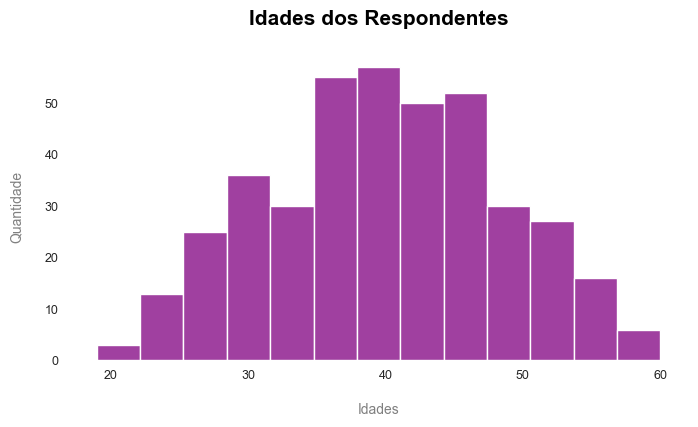

In [16]:
# Utilizando a função histograma para analisar a distribuição das idades entre os respondentes
histograma(df, 'age', ('Idades', 'Idades dos Respondentes'))

In [17]:
# Verificando a moda dos valores da variável 'age' (idade)
df['age'].mode()

0    46
Name: age, dtype: int64

A partir do histograma acima fica evidente a concentração de clientes na faixa etária de 30 a 46 anos, representando o possível público alvo da empresa.

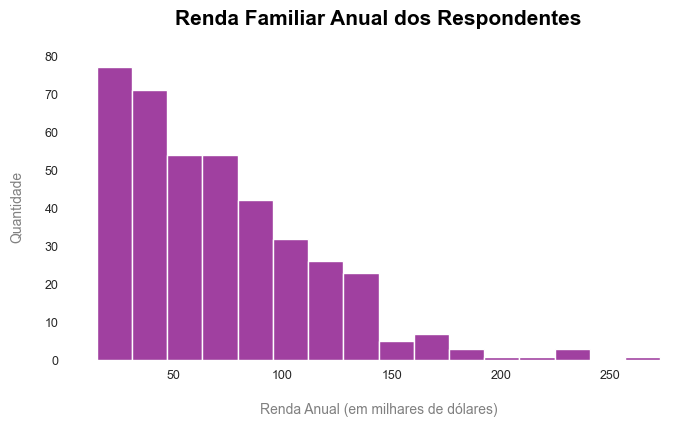

In [18]:
# Analisando a distribuição de renda dos respondentes
histograma(dados = df, var = 'income', legenda = ("Renda Anual (em milhares de dólares)", "Renda Familiar Anual dos Respondentes"))

In [19]:
print(f"{((len(df.loc[df['income'] < 100, :])/len(df)) * 100)} dos respondentes possui renda familiar anual inferior a 100 mil dólares")

76.5 dos respondentes possui renda familiar anual inferior a 100 mil dólares


É possível perceber que a maioria dos respondentes possui renda familiar anual concentrada na faixa de 30 a 100 mil dólares.

GIT PUSH 01